In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request


In [2]:
# Download dataset
url = "https://sp8138-heart-attack-dataset.s3.us-east-2.amazonaws.com/heart_attack_data.csv"
local_file = "heart_attack_data.csv"
urllib.request.urlretrieve(url, local_file)


('heart_attack_data.csv', <http.client.HTTPMessage at 0x7e8d87b8d5d0>)

In [3]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv(local_file)


In [4]:
# Display basic information about the dataset
print("===== DATASET INFO =====")
print(df.info())
print("\n===== FIRST 5 ROWS =====")
display(df.head())


===== DATASET INFO =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Age                    372974 non-null  int64  
 1   Gender                 372974 non-null  object 
 2   Cholesterol            372974 non-null  int64  
 3   BloodPressure          372974 non-null  int64  
 4   HeartRate              372974 non-null  int64  
 5   BMI                    372974 non-null  float64
 6   Smoker                 372974 non-null  int64  
 7   Diabetes               372974 non-null  int64  
 8   Hypertension           372974 non-null  int64  
 9   FamilyHistory          372974 non-null  int64  
 10  PhysicalActivity       372974 non-null  int64  
 11  AlcoholConsumption     372974 non-null  int64  
 12  Diet                   372974 non-null  object 
 13  StressLevel            372974 non-null  int64  
 14  Ethnicity  

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [5]:
# Check for missing values in the dataset
print("\n===== MISSING VALUES =====")
print(df.isnull().sum())



===== MISSING VALUES =====
Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64


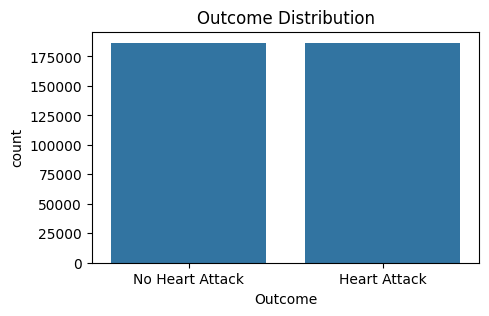

Outcome
No Heart Attack    186658
Heart Attack       186316
Name: count, dtype: int64


In [6]:
# Visualize the distribution of the outcome variable
plt.figure(figsize=(5,3))
sns.countplot(data=df, x="Outcome")
plt.title("Outcome Distribution")
plt.show()
print(df['Outcome'].value_counts())


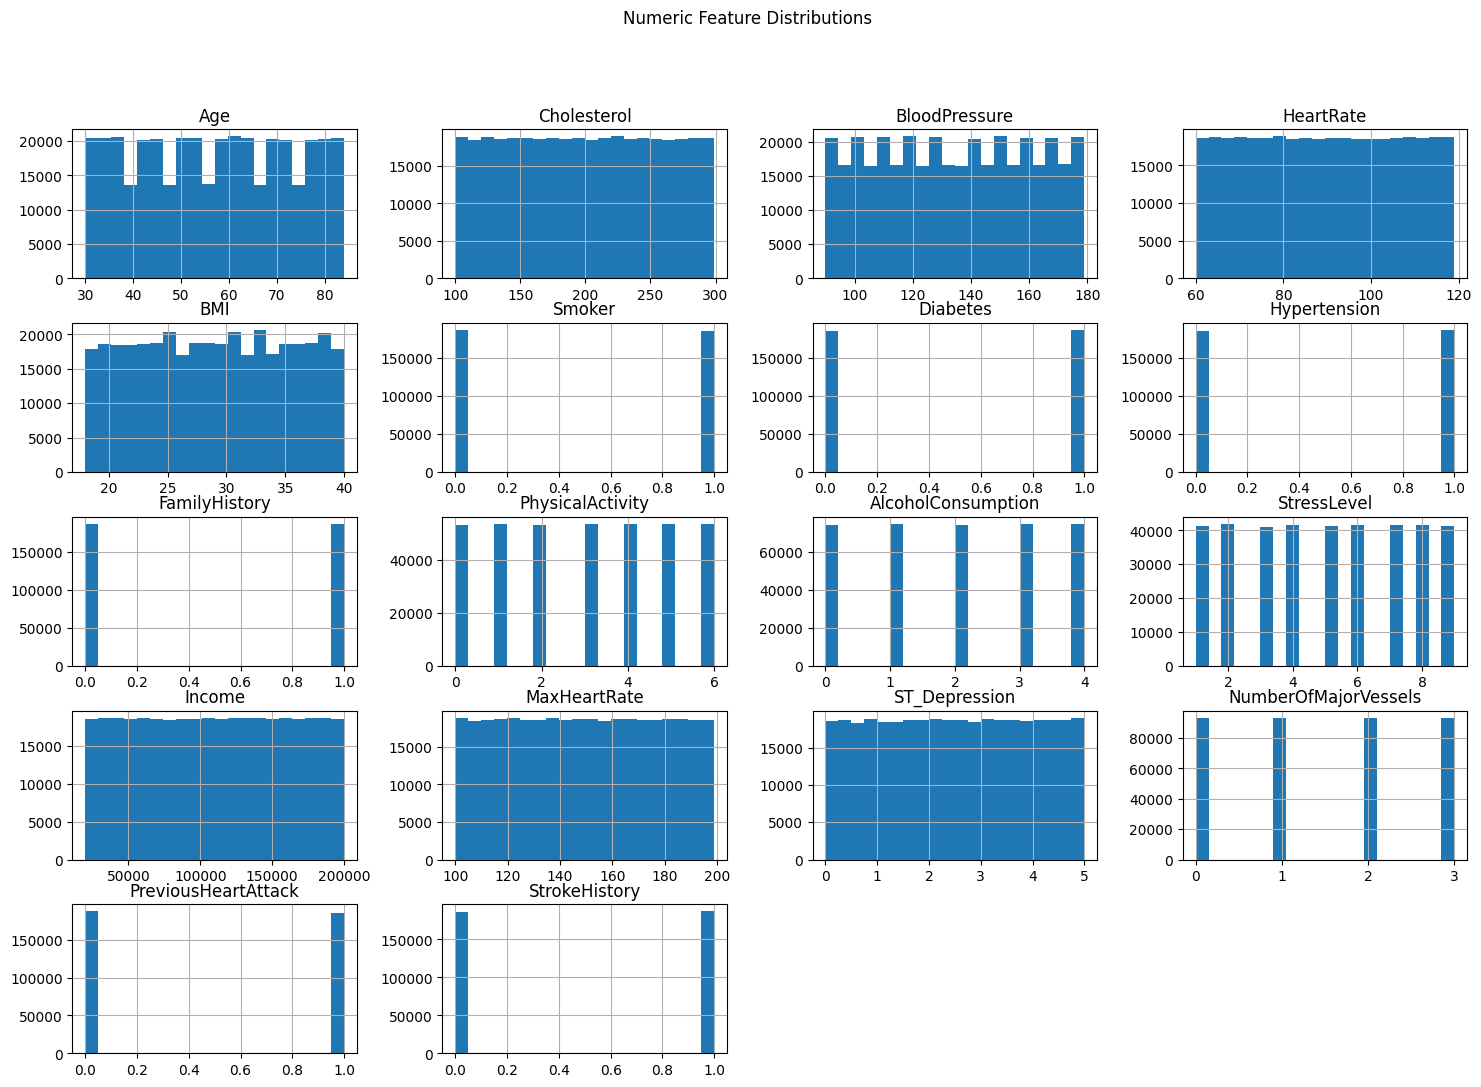

In [7]:
# Plot histograms for all numeric features
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols].hist(figsize=(18, 12), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()


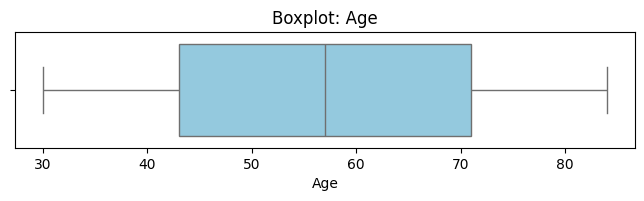

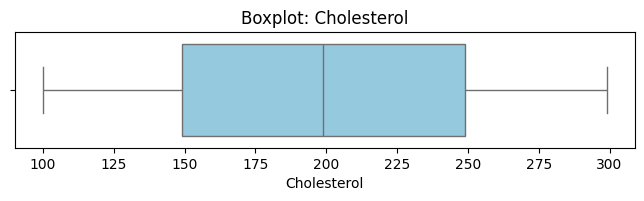

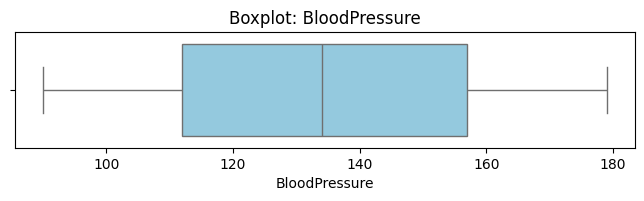

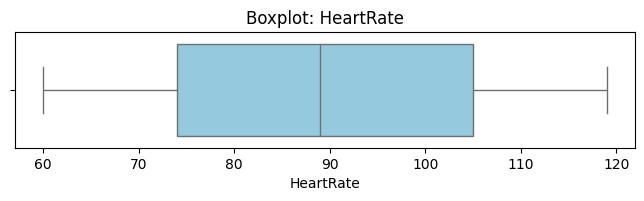

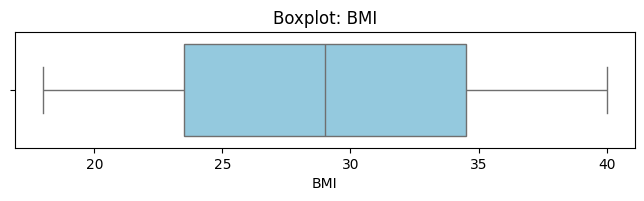

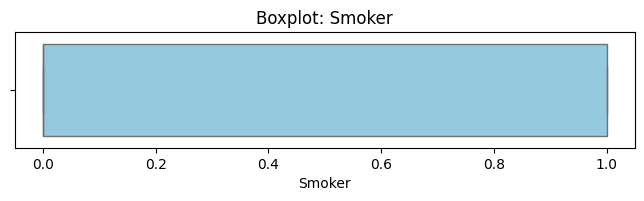

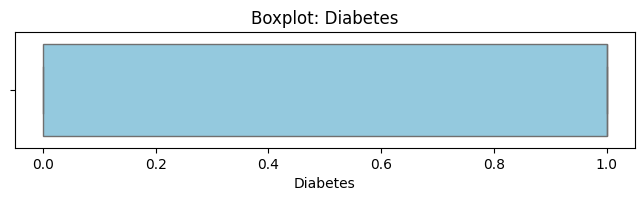

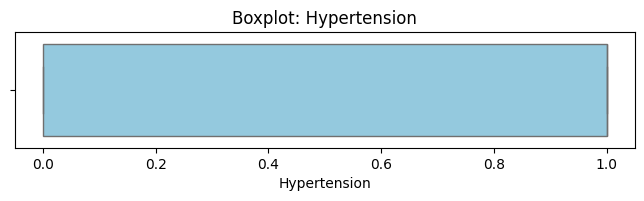

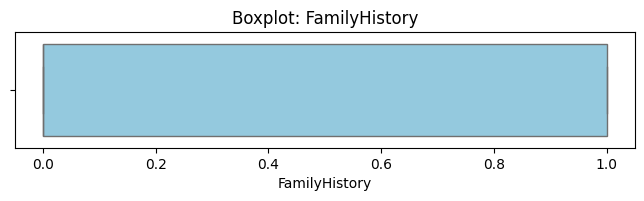

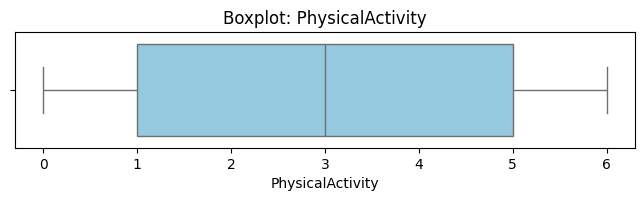

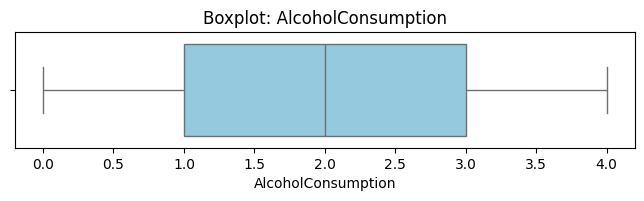

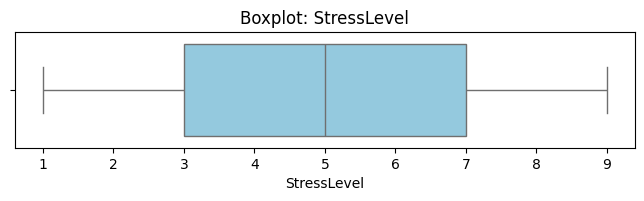

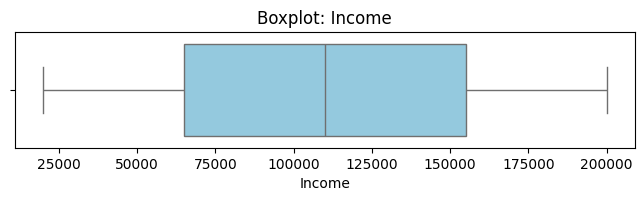

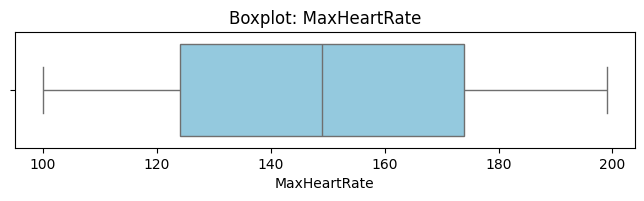

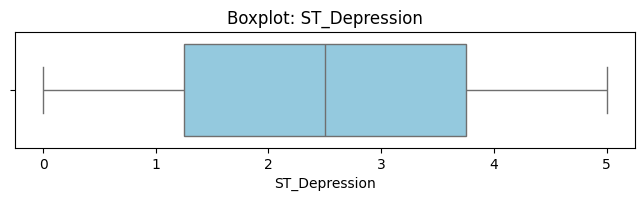

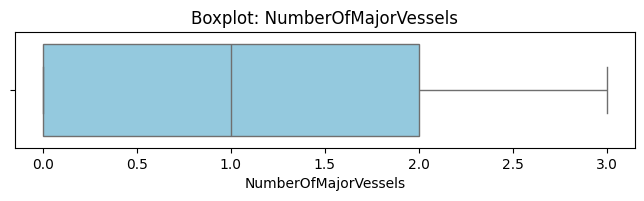

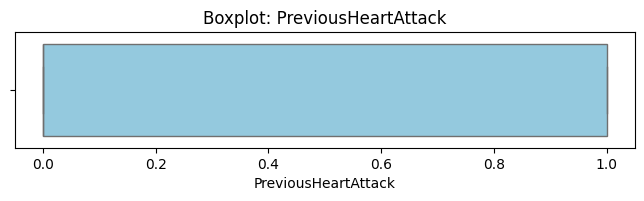

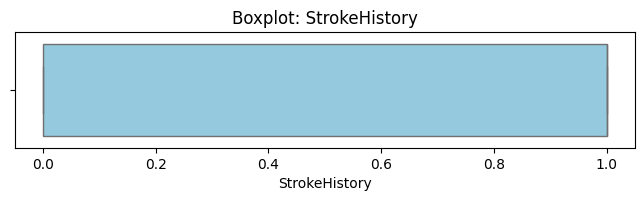

In [8]:
# Create boxplots for each numeric feature to identify outliers
for col in num_cols:
    plt.figure(figsize=(8,1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot: {col}")
    plt.show()


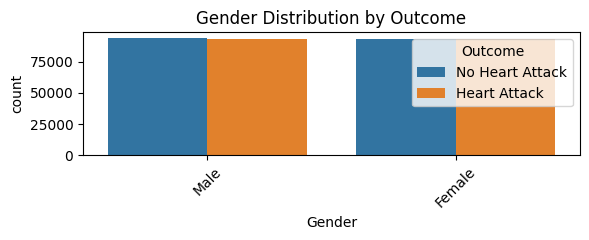

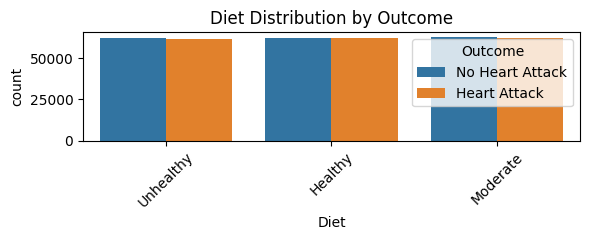

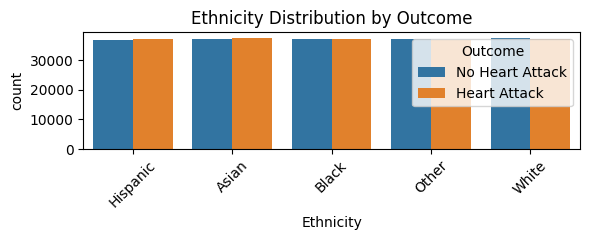

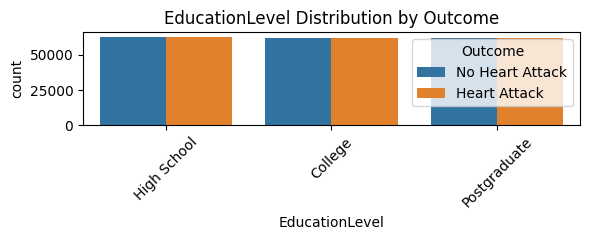

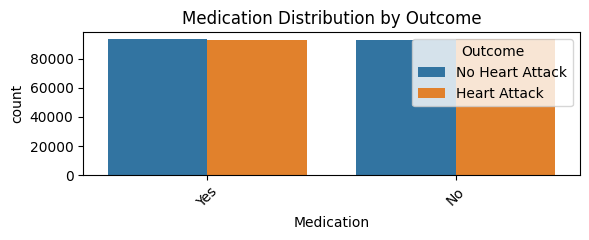

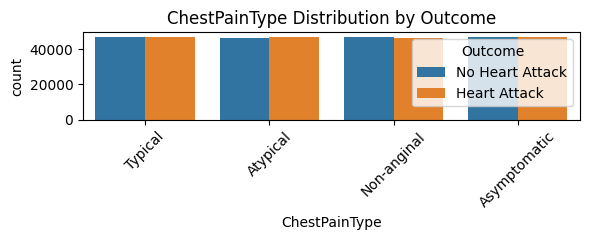

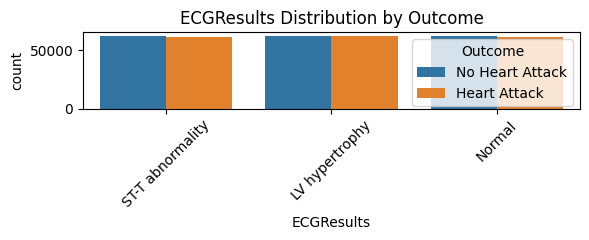

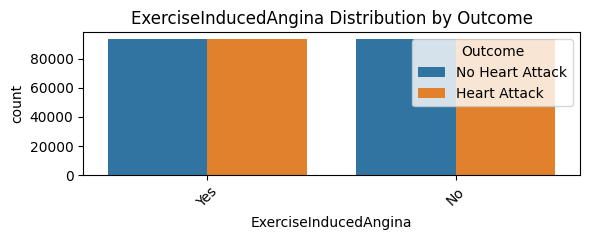

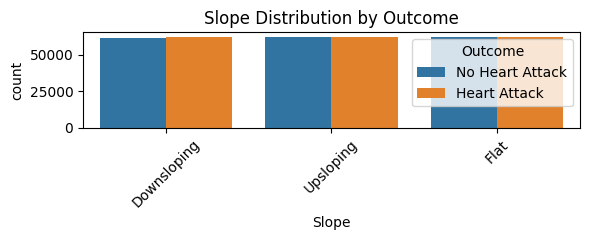

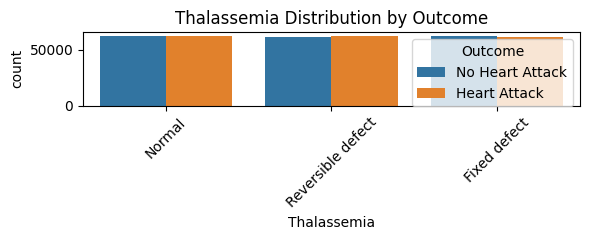

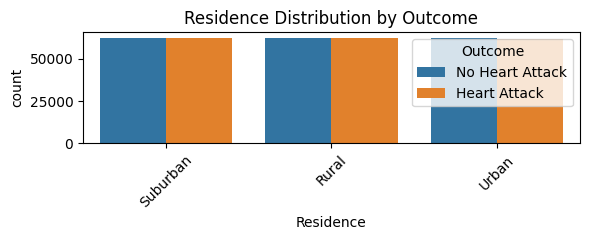

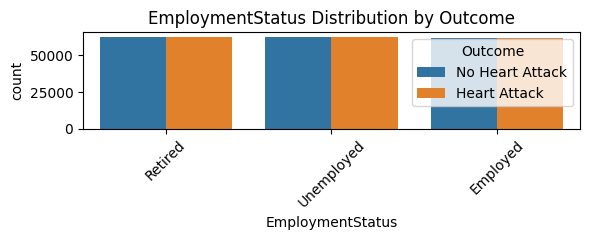

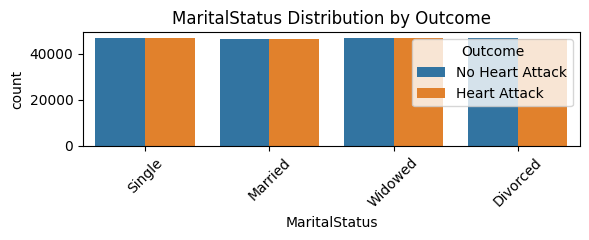

In [9]:
# Visualize the distribution of categorical features by outcome
cat_cols = df.select_dtypes(include='object').columns.drop('Outcome')
for col in cat_cols:
    plt.figure(figsize=(6,2.5))
    sns.countplot(data=df, x=col, hue="Outcome")
    plt.title(f"{col} Distribution by Outcome")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


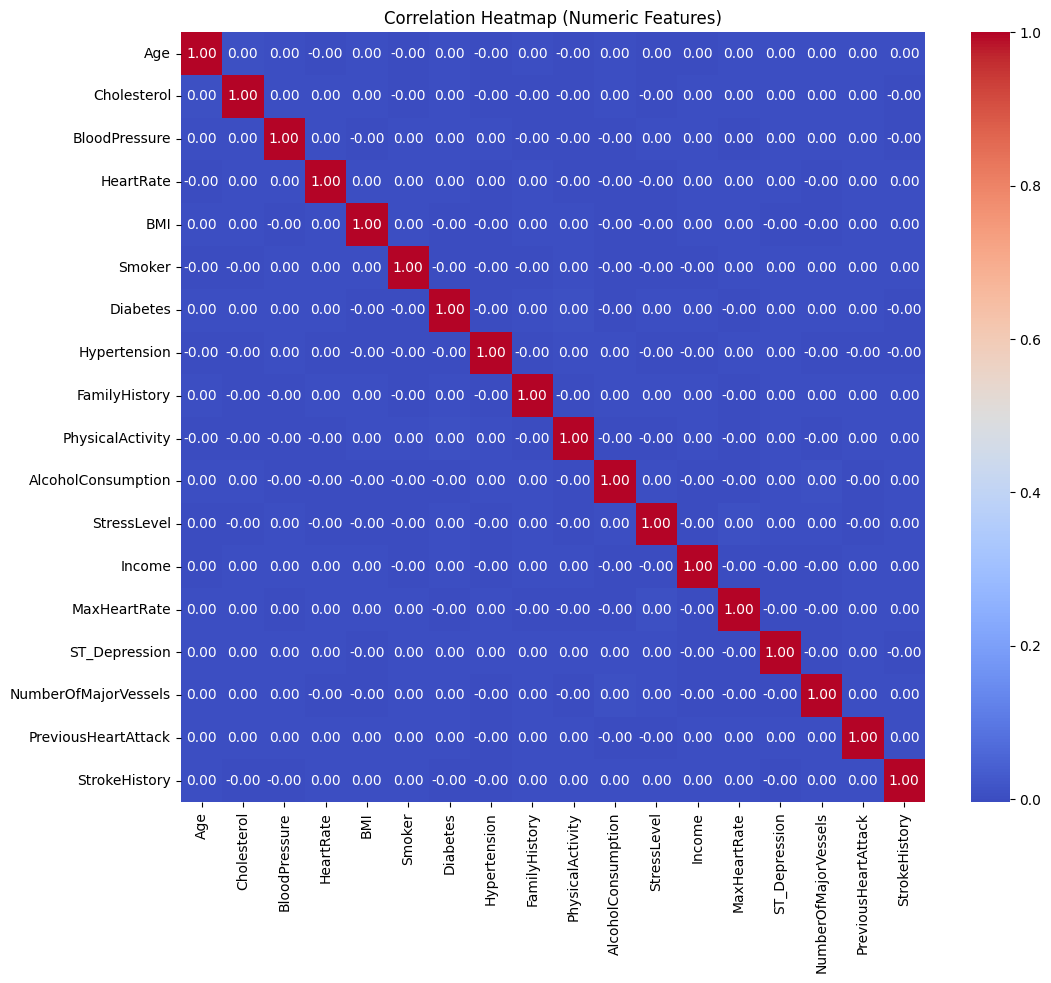

In [10]:
# Create a heatmap to visualize correlations between numeric features
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [11]:
# Calculate and display the top features correlated with the outcome
df_corr = df.copy()
df_corr['OutcomeCode'] = df_corr['Outcome'].astype('category').cat.codes
corr_with_outcome = df_corr[num_cols].corrwith(df_corr['OutcomeCode']).abs().sort_values(ascending=False)
print("\n===== TOP 10 NUMERIC FEATURES CORRELATED WITH OUTCOME =====")
print(corr_with_outcome.head(10))



===== TOP 10 NUMERIC FEATURES CORRELATED WITH OUTCOME =====
PreviousHeartAttack    0.003791
StressLevel            0.002316
Cholesterol            0.001962
AlcoholConsumption     0.001679
Income                 0.001613
StrokeHistory          0.001546
HeartRate              0.001471
Age                    0.000947
Smoker                 0.000830
Diabetes               0.000710
dtype: float64


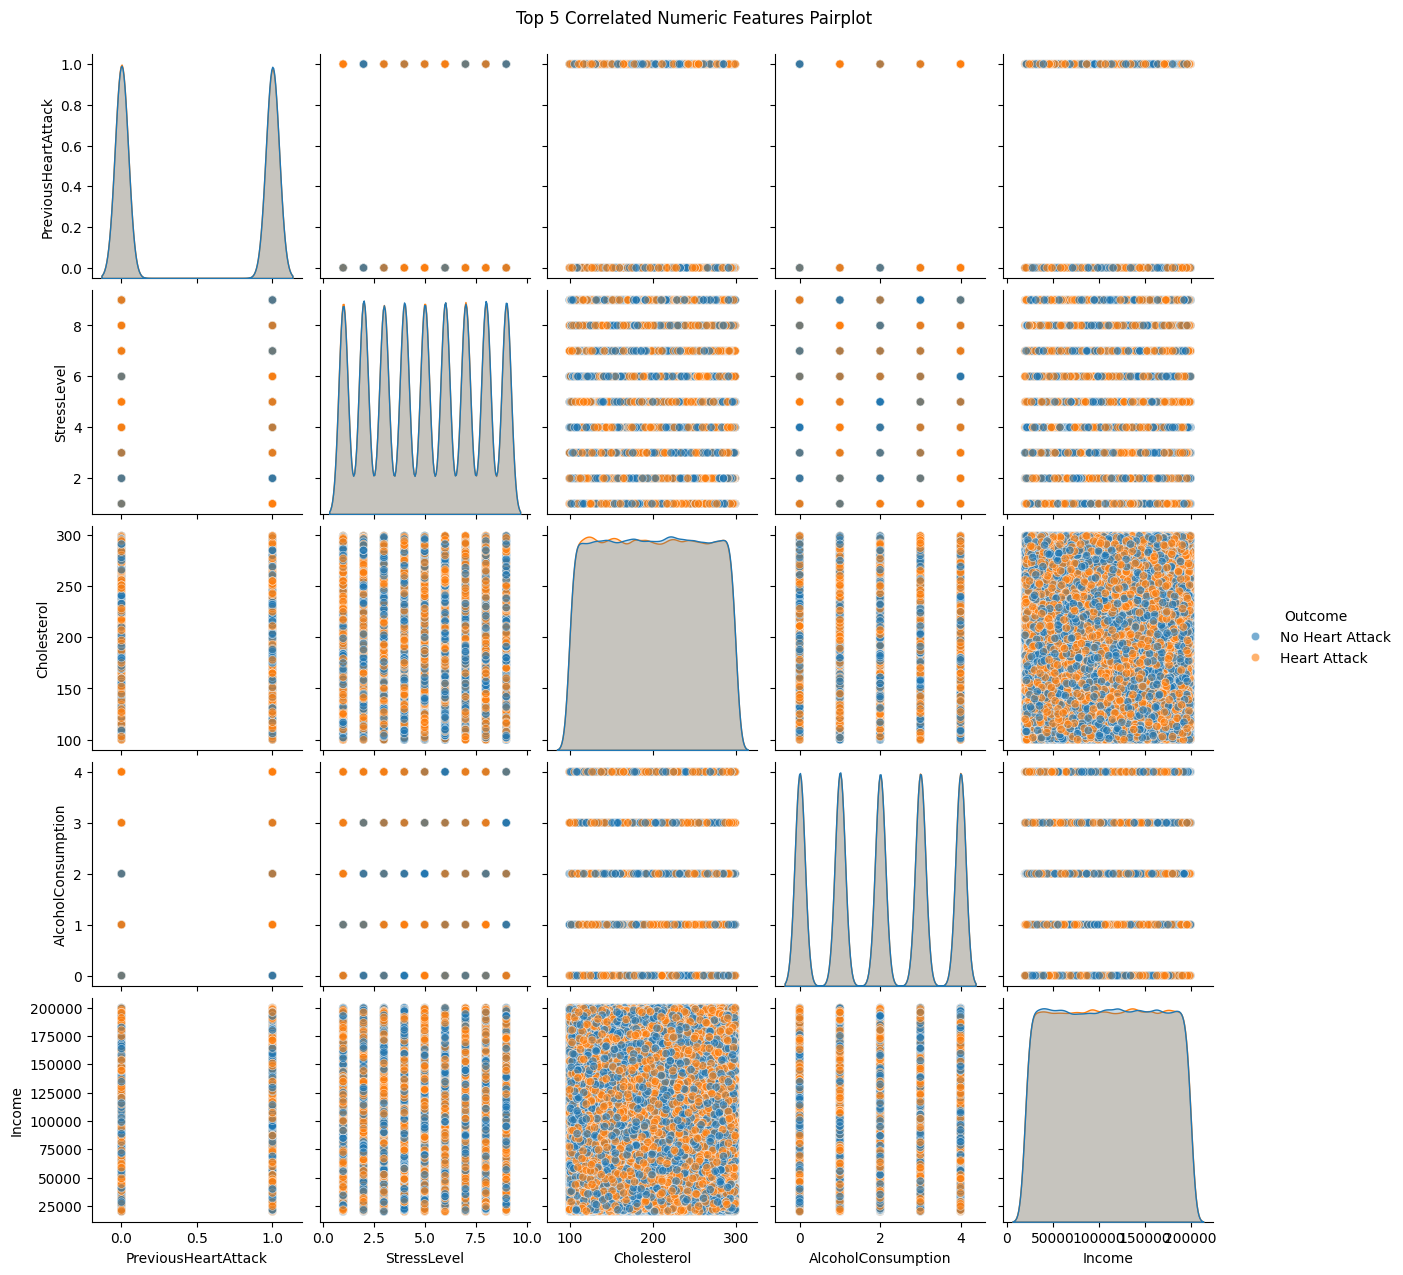

In [12]:
# Create a pairplot for the top 5 correlated numeric features
top5 = corr_with_outcome.head(5).index.tolist()
sns.pairplot(df, vars=top5, hue="Outcome", plot_kws={'alpha':0.6})
plt.suptitle("Top 5 Correlated Numeric Features Pairplot", y=1.02)
plt.show()


In [13]:
# Display the distribution of categorical features by outcome
print("\n===== CATEGORICAL FEATURE DISTRIBUTION BY OUTCOME =====")
for col in cat_cols:
    cross = pd.crosstab(df[col], df['Outcome'], normalize='index')
    print(f"\n{col} (proportion of Outcome):")
    print(cross)



===== CATEGORICAL FEATURE DISTRIBUTION BY OUTCOME =====

Gender (proportion of Outcome):
Outcome  Heart Attack  No Heart Attack
Gender                                
Female       0.500489         0.499511
Male         0.498597         0.501403

Diet (proportion of Outcome):
Outcome    Heart Attack  No Heart Attack
Diet                                    
Healthy        0.500004         0.499996
Moderate       0.499700         0.500300
Unhealthy      0.498918         0.501082

Ethnicity (proportion of Outcome):
Outcome    Heart Attack  No Heart Attack
Ethnicity                               
Asian          0.500534         0.499466
Black          0.498309         0.501691
Hispanic       0.502004         0.497996
Other          0.498982         0.501018
White          0.497886         0.502114

EducationLevel (proportion of Outcome):
Outcome         Heart Attack  No Heart Attack
EducationLevel                               
College             0.500750         0.499250
High School     

In [14]:
print("\n===== EDA COMPLETE =====")



===== EDA COMPLETE =====
